<a href="https://colab.research.google.com/github/GeneralHassaan/Projects/blob/main/Hassaan_Classification_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Metrics:


![target image](https://github.com/ninja-josh/image-storage/raw/main/qft5tas90c801%20(1).jpeg)

## How do we know if our model is any good?


## Regression vs Classification Metrics

### Regression Metrics

In a regression model a target label could have any value (theoretically).

When we are creating a regression model, we try to create a model that predicts a label that is as close to the true label value for a sample as possible.  This is why we use metrics like mean absolute error, mean squared error, or root mean squared error.  We want to know how far away the prediction from the truth.  In fact, our model may never make a perfectly accurate prediction and that's fine, as long as it is close enough.

### Classification Metrics

With classification models each sample is a member of one of a finite number of classes.  For each sample, either the model predicts the correct class or predicts one of the incorrect classes.  It's right or wrong, there is no 'close'.

Because of this we need different metrics.  In this lesson we will explore how to evaluate a classification model using:

1. Accuracy
2. Precision
3. Recall
4. A Confusion Matrix

In [ ]:
# HASSAAN ASIF

In [ ]:
import pandas as pd
import numpy as np
#import seaborn to make a nice heatmap for our confusion matrix
import seaborn as sns

#import some necessary tools
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

#Importing the Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

#imports I made
from sklearn.linear_model import LogisticRegression

'Breast Cancer Wisconsin' is a binary classification dataset that comes with the sklearn package in order to demonstrate and experiment with models.  We will use this well studied and pre-cleaned dataset to demonstrate how to evaluate a classification model on a binary classification problem.  Each record in this dataset is a mass in a breast and each feature is a measurement of that mass.  The target is 0 = benign, or 1 = malignant.

Our task will be to create a model that classifies a given mass as either benign or malignant.  

In [ ]:
#Load the Data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target, columns=['outcome'])
print(y.value_counts(normalize=True))
X.head()

outcome
1          0.627417
0          0.372583
dtype: float64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Train-test split.  Set the random state to 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Baseline vs Decision Tree

In [ ]:
#Create a DecisionTreeClassifier 
dec_tree = DecisionTreeClassifier(random_state = 20, max_depth=2)
dec_tree.fit(X_train, y_train)
#Create a DummyClassifier model using the 'most_frequent' strategy
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
#Fit both models on the training data and save their predictions on the test sets
dec_tree.predict(X_test)
dummy_clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Quickly remind yourself of what you learned about type 1 and type 2 errors.  In every binary classification problem we select one class to be the **'positive'** class and one to be the **'negative'** class.  The positive class should be the one you are most interested in finding.  For our breast cancer dataset the positive class will be the malignant masses and the negative class will be the benign one.

## Type 1 error:
If our model predicts that a mass is malignant, but it is in fact benign, it will have made a type 1 error.  This is also known as a false positive

## Type 2 error:
If our model predicts that a mass is benign, when in fact it is malignant, it will have made a type 2 error.  This is also known as a false negative.


*Which of these do you think is worse in this case?  If we have to increase one kind of error in order to minimize the other kind, which would we want to minimize?  Why?*

# Accuracy

Accuracy is the metric that is most intuitive.  This is defined as:

$$
accuracy = \frac{True  Positives + True  Negatives}{All  Samples}
$$

In other words accuracy is correct predictions our model made out of the total number of predictions.

Pros:
Accuracy is easy to understand and gives a combined picture of both kinds of errors in one number.

Cons: Accuracy can be deceiving when a dataset is unbalanced.  It also does not give specific information about the kinds of errors that a model is making.

For example, we saw above that 62% of our samples are malign masses when we did `y.value_counts(normalize=True)`

To use the sklearn metrics functions we pass them first the true labels, then the predicted labels.  For example: `accuracy = accuracy_score(y_test, y_pred)`

In [ ]:
#Print the accuracy of both models on the test set
train_score = dummy_clf.score(X_train, y_train)
test_score = dummy_clf.score(X_test, y_test)
print('dummy_clf')
print(train_score)
print(test_score)

train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print('dec_tree')
print(train_score)
print(test_score)

dummy_clf
0.6291079812206573
0.6223776223776224
dec_tree
0.9460093896713615
0.916083916083916


If our dataset were even more imbalanced, say 99.9% malignant, then a prediction that EVERYTHING is malignant would have a very high accuracy.  However, that would not be a very useful model for actual medical use.  More often we see the opposite: a disease is very rare, occurring .01% of the time or less, and a model that predicts that NO samples ever have the disease will have a high accuracy, but will actually be useless...and dangerous!

# Recall

When we want to reduce the number of false negatives, we want to improve recall.

Recall is defined as: 

$$
recall = \frac{True Positives}{False Negatives + True Positives}
$$

That is to say: how many samples did our model label as positive out of all of the true positive samples?

Pros: A higher recall means fewer false negative predictions, also known as type 2 errors.  It's great for when classifying a positive as a negative is a costly mistake.

Cons: Does not consider how many samples are falsely labeled as positive, or false positives.  It does not penalize type 1 errors.

In the case of this dataset, we might assume that the consequence for a false negative is that a person needlessly dies from cancer while the consequence for a false positive is that someone has unnecessary surgery.  While neither is great, the second is generally going to be less bad.  A high recall means fewer malignant masses going untreated.

You can use the Scikit-Learn function: `metrics.recall_score()` to calcuate this.  Check the documentation on this function for more information.

In [ ]:
#Print the recall scores of both models.
y_pred = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
recall_score(y_test, y_pred)

1.0


You can see that our Decision Tree model has a high recall, but just predicting that ALL tumors are malignant gives us a perfect recall of 1!  While we want to catch as many malignant tumors as possible, we don't want to just send everyone under the knife, especially since we know that 38% don't need surgery!

# Precision

When we want to reduce the number of false positives, we want to improve precision.

Precision is defined as:

$$
precision = \frac{True Positives}{False Positives + True Positives}
$$

In other words: What ratio of the samples that we predicted were in the positive class were actually in the positive class?

Pros:  A high precision means fewer type 1 errors, or fewer false positives.  This is a good metric to maximize if a false positive prediction is a costly mistake.

Cons: Precision does not penalize a model for false negatives.  It does not count type 2 errors.

In this case precision would be measuring how many of the tumors we elected to operate on were actually malignant.

You can use the Scikit-Learn function: `metrics.precision_score()` to calculate this.  Check the documentation on this function for more information.

In [ ]:
#Print the precision scores of both models.
y_pred = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
precision_score(y_test, y_pred)

0.6223776223776224

# The Complete Picture: Confusion Matrices and classification_report()

As you have seen, precision, precision, and recall each only tell part of the story.  In order to get the full picture of how your model is performing and what kinds of mistakes it tends to make, you need to look at a confusion matrix and/or sklearn's handy `classification_report()` function.

Use ConfusionMatrixDisplay to display a confusion matrix of the model predictions.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


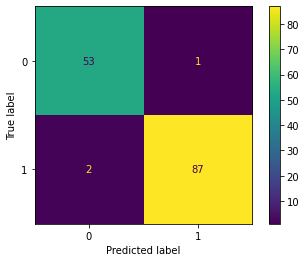

In [ ]:
from numpy.random.mtrand import logistic
logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression())
logreg_pipe.fit(X_train, y_train)

predictions = logreg_pipe.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test,predictions )


We see the false positives predictions (top right) and false negative predictions (bottom left) that our model made.  However, the bottom left is out of 89 total and the top right is out of 54 total.  We can see the normalized ratios of true and false predictions by normalizing along the 'true' or 'pred' axes in the ConfusionMatrixDisplay.  

To normalize along the 'true' axis, we set  normalize = 'true'`.  

Notice that it is the string 'true' NOT the boolean value: `True`

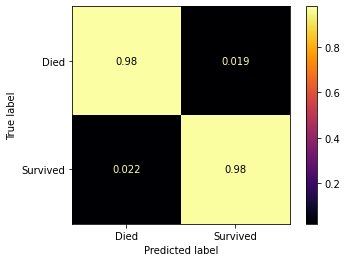

In [ ]:
#Recreate the confusion matrix above, but with the values normalized along the 'true' axis.
labels=['Died','Survived']
ConfusionMatrixDisplay.from_predictions(y_test, predictions, display_labels=labels, cmap = 'inferno'
, normalize = 'true')

We can now see that our Decision Tree model successfully classified 94% of the samples in both classes, benign (class 0) and malignant (class 1)

Another quick way to check the accuracy, recall, and precision of a model on a test set is with `classification_report()`, which runs several metrics on both classes simultaneously.

In [ ]:
#Use classifiction_report() to print a report of several metrics for all classes at once
#for both model

classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.96      0.98      0.97        54\n           1       0.99      0.98      0.98        89\n\n    accuracy                           0.98       143\n   macro avg       0.98      0.98      0.98       143\nweighted avg       0.98      0.98      0.98       143\n'

You'll notice that each class has a different recall and precision.  f1-score, by the way, is the harmonic mean of the precision and recall.  

classification_report also tells us the averages of the precisions, means, and f1-scores.  'support' is how many samples there are of each class.

# Multi-class Metrics

Precision, recall, and accuracy also extend to cases when we have more than 2 possible classes.  However, in order to know how to calculate precision and recall we have to decide which class is our positive class.  We also become interested in the most complex patterns of errors that can occur.  

For example, suppose we have a problem with 3 possible classes.  We might ask: 

When our model misclassifies class 1 samples, is it more often classifying them as class 0, or class 2?  This may help us understand why it is making that kind of mistake and how we can improve performance.

This is where confusion matrices become even more useful in understanding how our model is behaving.

# Summary

Accuracy, precision, and recall all are metrics that give us different insights into how our model is performing in making predictions.  No one of them alone tells us everything, and different metrics are more or less important depending on our business problem.

However, we need to measure all three to make sure our model is making useful predictions.  Two ways to do this quickly are with a confusion matrix and a classification report.